In [1]:
#%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm.auto import tqdm

In [2]:
def read_npz(file):
    file = np.load(file)
    if "arr_0" in file:
        fp = file["arr_0"]
    else:
        fp = file["fps"]
    file.close()
    fp = np.unpackbits(fp, axis=1)
    return fp

In [3]:
experiment = "output"

In [4]:
#colors = "Set1"
colors = sns.color_palette(["gray", "royalblue", "limegreen", "fuchsia"])

In [5]:
all_data = pd.read_csv(f"{experiment}/promiscuous_processed.csv")
all_data["class_set"] = all_data[["class","set"]].apply(lambda x: ' '.join(x), axis=1)

In [6]:
all_data

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,NLL_0,NLL_1,...,NLL_192,NLL_193,NLL_194,NLL_195,NLL_196,NLL_197,NLL_198,NLL_199,NLL_200,class_set
0,1483729,C#CCN1c2ccccc2Sc3c1nccc3,C#CCN1c2ccccc2Sc2cccnc21,multitarget,training,174,6,True,21.387634,21.237390,...,16.529953,16.579832,16.597193,16.598688,16.543293,16.469414,16.514149,16.565979,16.504505,multitarget training
1,2803060,C#CCSc1c(c(sn1)SCC#C)C#N,C#CCSc1nsc(SCC#C)c1C#N,multitarget,training,244,6,True,25.435406,25.543407,...,16.977541,17.072138,17.067848,17.018055,16.830230,16.742233,16.677542,16.708557,16.730461,multitarget training
2,16195846,C#Cc1ccc(cc1)C2CC(OC(=C2)C(=O)N3CCN(CC3)Cc4ccc...,C#Cc1ccc(C2C=C(C(=O)N3CCN(Cc4ccccc4)CC3)OC(OCC...,multitarget,training,151,6,True,26.490920,26.334568,...,20.697884,20.671890,20.672901,20.686928,20.666473,20.573582,20.579933,20.707083,20.698412,multitarget training
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,16.172943,16.166480,...,14.846571,15.024720,14.982287,14.865892,14.852013,14.901800,14.970851,15.054768,14.919376,multitarget test
4,219402,C(=O)C(C1C(C(C(=O)O1)O)O)O,O=CC(O)C1OC(=O)C(O)C1O,multitarget,test,100,6,True,28.578636,28.121542,...,26.758510,26.623638,26.574932,26.662964,26.547087,26.294607,26.226974,26.233580,26.405636,multitarget test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126660,2271648,COc1ccc(cc1OC)C(=O)NCCSCc2ccco2,COc1ccc(C(=O)NCCSCc2ccco2)cc1OC,notarget,test,271,0,True,21.621990,21.261372,...,20.394420,20.464436,20.385246,20.422644,20.343554,20.201818,20.377756,20.376064,20.427292,notarget test
126661,16015661,COc1ccccc1OCC(=O)NCC2(CCCCC2)N3CCOCC3,COc1ccccc1OCC(=O)NCC1(N2CCOCC2)CCCCC1,notarget,test,36,0,True,20.991210,20.982899,...,24.373564,24.396523,24.438263,24.556833,24.522337,24.390020,24.422657,24.407433,24.354984,notarget test
126662,6460680,Cc1c(c(=O)n2c(n1)nc([nH]2)NC(=O)c3ccccc3F)Cl,Cc1nc2nc(NC(=O)c3ccccc3F)[nH]n2c(=O)c1Cl,notarget,test,35,0,True,40.816193,38.581573,...,34.832237,34.861350,35.050010,35.229584,35.210610,34.906185,35.122765,35.377747,35.315840,notarget test
126663,51359661,CCOC(=O)C1CSCCS(=O)(=O)N1Cc2cccc(c2)F,CCOC(=O)C1CSCCS(=O)(=O)N1Cc1cccc(F)c1,notarget,test,30,0,True,25.938965,26.273390,...,31.086374,31.321445,31.371016,31.305890,31.340025,31.437233,31.563883,31.821478,31.634583,notarget test


In [7]:
value_var = list(map(str,list(range(0,201))))
def renamer(x):
    if x.startswith("NLL"):
        x = x.split("_")[-1]
    return x
all_data_plot = all_data.copy().rename(columns=renamer)
all_data_plot = pd.melt(all_data_plot, id_vars='class_set', value_vars=value_var, var_name="Epoch", value_name='Negative Log Likelihood')
all_data_plot.Epoch = all_data_plot.Epoch.astype("int").astype('category')
all_data_plot.class_set = all_data_plot.class_set.astype('category')
#all_data_plot.class_set.cat.reorder_categories(['NonPromiscuous (test)', 'Promiscuous (training)', 'Promiscuous (test)'], inplace=True)
#all_data_plot.class_set.cat.rename_categories({'NonPromiscuous (test)':"NonPromiscuous"}, inplace=True)
all_data_plot["Negative Log Likelihood (Base 10)"]=-1*np.log10(np.exp(-1*all_data_plot["Negative Log Likelihood"]))
all_data_plot["Negative Log Likelihood (Base e)"] = all_data_plot["Negative Log Likelihood"]

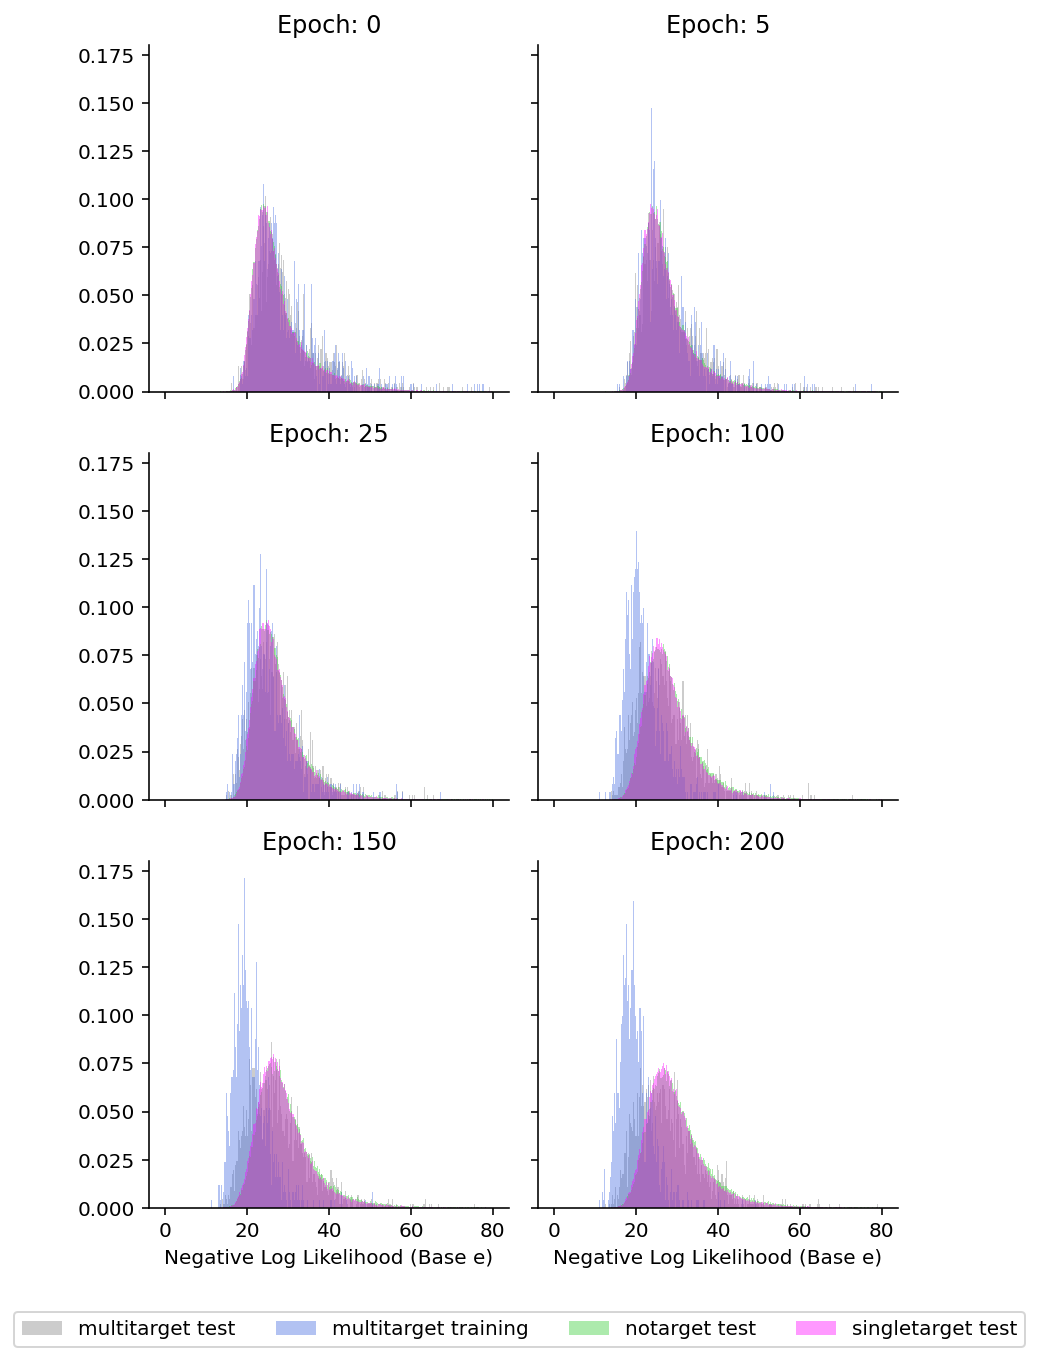

Negative Log Likelihood (Base e)            \
                                                  median       std   
class_set         Epoch                                              
multitarget test  0                            28.027624  9.220258   
                  1                            27.559660  8.850539   
                  2                            27.362820  8.556170   
                  3                            27.227280  8.361053   
                  4                            27.093111  8.244932   
...                                                  ...       ...   
singletarget test 196                          28.288099  7.468861   
                  197                          28.229828  7.487366   
                  198                          28.279121  7.456579   
                  199                          28.298271  7.474500   
                  200                          28.266465  7.460975   

                                                   
                        25% Quartile 75% Quartile  
class_set         Epoch                            
multitarget test  0        24.470410    33.708923  
                  1        24.154825    33.114630  
                  2        24.002668    32.751602  
                  3        23.852253    32.509995  
                  4        23.719490    32.399925  
...                              ...          ...  
singletarget test 196      24.793554    32.939336  
                  197      24.721407    32.906023  
                  198      24.779012    32.909595  
                  199      24.787819    32.948435  
                  200      24.776101    32.919364  

[804 rows x 4 columns]

In [8]:

to_print = 'Negative Log Likelihood (Base e)'
if to_print == 'Negative Log Likelihood (Base 10)':
    bins=np.linspace(0, 40, 160) 
else:
    bins=np.linspace(0, 80, 320) 
all_data_plot_facet = all_data_plot.query("Epoch in [0,5,25,100,150,200]").copy()
all_data_plot_facet.Epoch.cat.remove_unused_categories(inplace=True)
g = sns.FacetGrid(all_data_plot_facet, col="Epoch", hue="class_set", palette=colors, col_wrap=2)
g.map(plt.hist, to_print,  alpha=0.4, density=True, bins=bins)
g.axes[-1].legend(bbox_to_anchor=(-0.05, -0.35), loc='center', ncol=4)
for ax in g.axes:
    title=ax.get_title()
    title = title.replace(" = ",": ")
    ax.set_title(title)
plt.show()
def rename(newname):
    def decorator(f):
        f.__name__ = newname
        return f
    return decorator

def q_at(y):
    @rename(f'{y*100:0.0f}% Quartile')
    def q(x):
        return x.quantile(y)
    return q


stats = {to_print: ['median', 'std', q_at(0.25) ,q_at(0.75)]}
all_data_plot.groupby(["class_set", "Epoch"]).agg(stats)

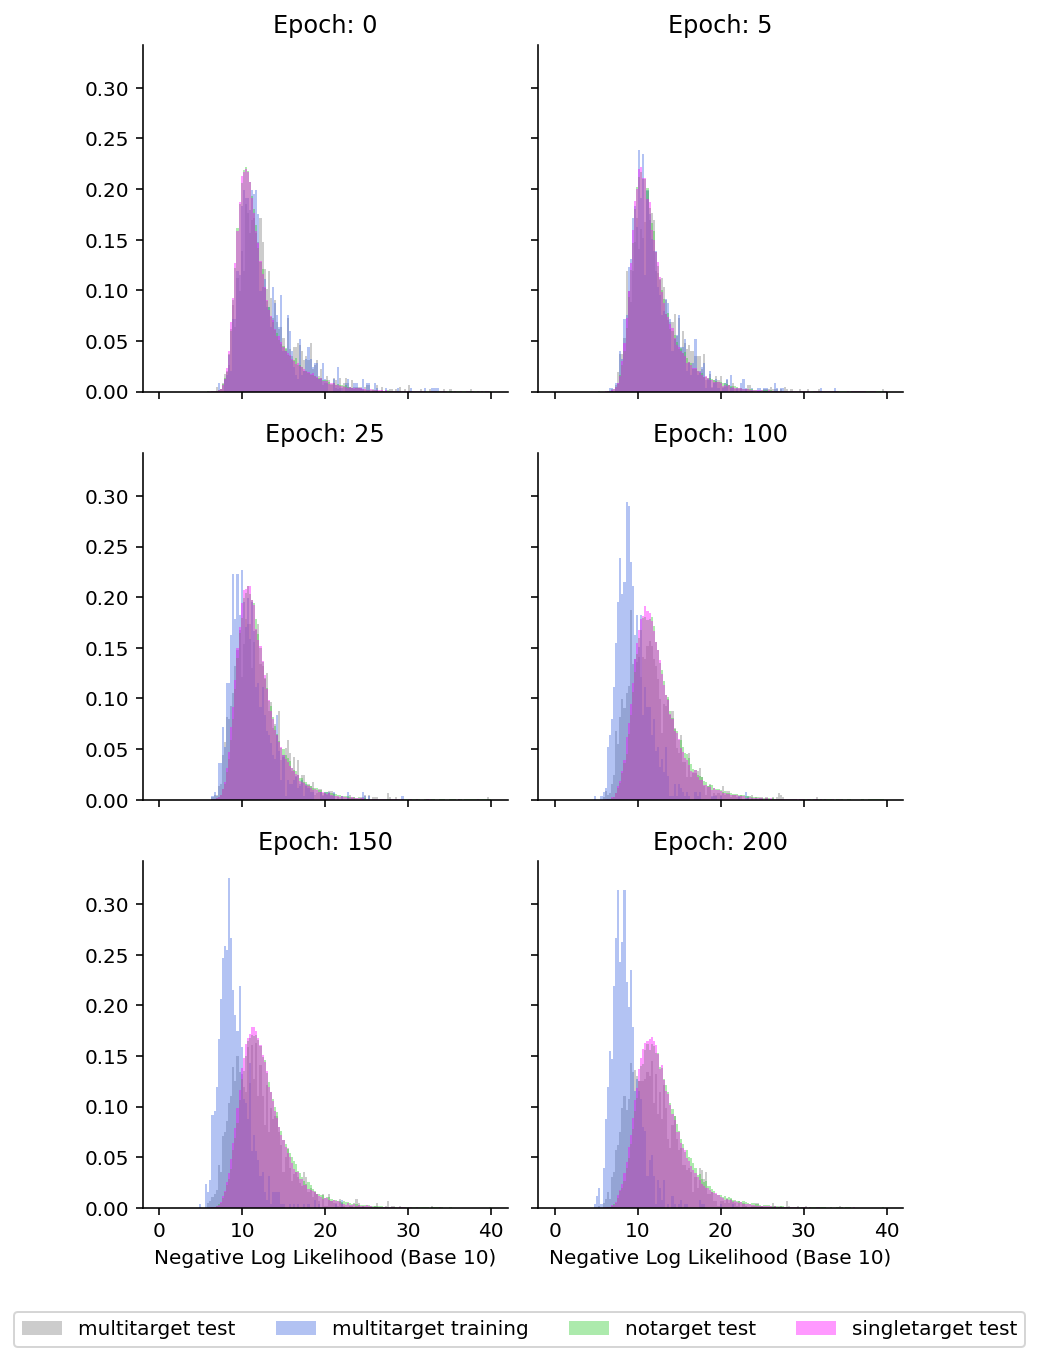

In [9]:
to_print = 'Negative Log Likelihood (Base 10)'
if to_print == 'Negative Log Likelihood (Base 10)':
    bins=np.linspace(0, 40, 160) 
else:
    bins=np.linspace(0, 80, 320) 
all_data_plot_facet = all_data_plot.query("Epoch in [0,5,25,100,150,200]").copy()
all_data_plot_facet.Epoch.cat.remove_unused_categories(inplace=True)
g = sns.FacetGrid(all_data_plot_facet, col="Epoch", hue="class_set", palette=colors, col_wrap=2)
g.map(plt.hist, to_print,  alpha=0.4, density=True, bins=bins)
legend = g.axes[-1].legend(bbox_to_anchor=(-0.05, -0.35), loc='center', ncol=4)
for ax in g.axes:
    title=ax.get_title()
    title = title.replace(" = ",": ")
    ax.set_title(title)
stats = {to_print: ['median', 'std', q_at(0.25) ,q_at(0.75)]}

In [10]:
legend

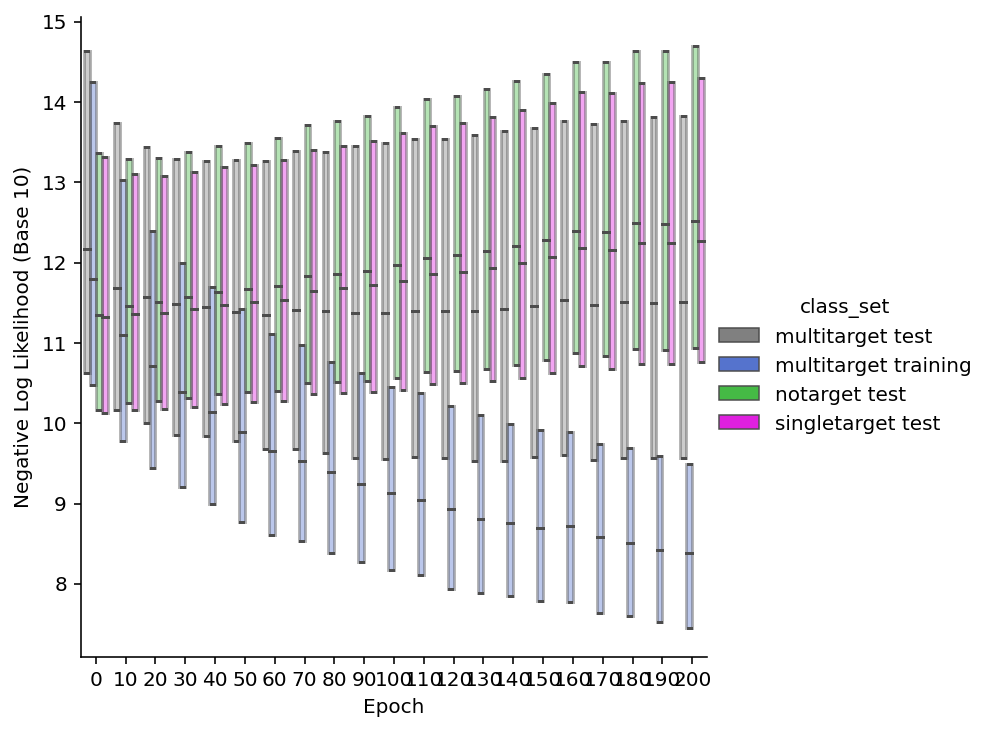

In [11]:
#plt.figure(figsize=(30,10))
epochs = range(0,201,10)
all_data_plot_bar = all_data_plot.query("Epoch in @epochs").copy()
all_data_plot_bar.Epoch.cat.remove_unused_categories(inplace=True)
gs = sns.catplot(x="Epoch", y="Negative Log Likelihood (Base 10)", hue="class_set", data=all_data_plot_bar, kind="box", palette=colors, showfliers = False,whis=0, boxprops=dict(alpha=.4))
#for patch in gs.ax.artists:
#    r, g, b, a = patch.get_facecolor()
#    patch.set_facecolor((r, g, b, .3))

#for legends in gs.fig.legends:
#    for leg in legends.legendHandles:
#        leg.set_alpha(0.4)
#gs.fig.legends=[]
#plt.show()
#gs.add_legend()
#legend = gs.fig.legend( bbox_to_anchor=(0.53,0.0), loc='center', ncol=4)
for handler in legend.legendHandles:
    handler.set_alpha(0.4)
    #handler.set_sizes([3.0])

#plt.subplots_adjust()
#plt.tight_layout()
#plt.savefig("barplots.svg", extra_bbox_artists=(legend,),bbox_inches='tight')
#plt.savefig("barplots.png", dpi=600, extra_bbox_artists=(legend,),bbox_inches='tight')

In [12]:
all_data_new_plot = all_data.copy()
del all_data_new_plot['cids']
del all_data_new_plot['NostereoAromaticSMILES']
del all_data_new_plot['rdkit_smiles']
del all_data_new_plot['class']
del all_data_new_plot['set']
del all_data_new_plot['inactive']
del all_data_new_plot['active']
del all_data_new_plot['encodable']
all_data_new_plot

,NLL_0,NLL_1,NLL_2,NLL_3,NLL_4,NLL_5,NLL_6,NLL_7,NLL_8,NLL_9,...,NLL_192,NLL_193,NLL_194,NLL_195,NLL_196,NLL_197,NLL_198,NLL_199,NLL_200,class_set
0,21.387634,21.237390,21.024277,21.000277,21.001444,20.674204,20.600582,20.508100,20.512814,20.580853,...,16.529953,16.579832,16.597193,16.598688,16.543293,16.469414,16.514149,16.565979,16.504505,multitarget training
1,25.435406,25.543407,25.608675,25.349827,25.054943,24.588469,24.338333,24.222303,23.899967,23.600044,...,16.977541,17.072138,17.067848,17.018055,16.830230,16.742233,16.677542,16.708557,16.730461,multitarget training
2,26.490920,26.334568,26.332966,26.272114,26.220348,26.083275,25.886850,25.743341,25.624780,25.659447,...,20.697884,20.671890,20.672901,20.686928,20.666473,20.573582,20.579933,20.707083,20.698412,multitarget training
3,16.172943,16.166480,16.112766,16.019280,15.911447,15.838299,15.660822,15.550562,15.489908,15.470511,...,14.846571,15.024720,14.982287,14.865892,14.852013,14.901800,14.970851,15.054768,14.919376,multitarget test
4,28.578636,28.121542,27.884237,27.663994,27.444000,27.265684,27.232368,27.105324,27.138916,27.162327,...,26.758510,26.623638,26.574932,26.662964,26.547087,26.294607,26.226974,26.233580,26.405636,multitarget test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126660,21.621990,21.261372,21.054300,20.756077,20.535137,20.290863,20.247234,20.184338,20.140148,20.076870,...,20.394420,20.464436,20.385246,20.422644,20.343554,20.201818,20.377756,20.376064,20.427292,notarget test
126661,20.991210,20.982899,21.097422,21.157965,21.221144,21.322723,21.510086,21.647880,21.691982,21.858044,...,24.373564,24.396523,24.438263,24.556833,24.522337,24.390020,24.422657,24.407433,24.354984,notarget test
126662,40.816193,38.581573,37.030690,36.166580,35.720078,35.527620,35.337770,35.196014,34.920010,34.717870,...,34.832237,34.861350,35.050010,35.229584,35.210610,34.906185,35.122765,35.377747,35.315840,notarget test
126663,25.938965,26.273390,26.652514,26.758385,26.818542,26.695694,26.684692,26.737982,26.773567,26.857370,...,31.086374,31.321445,31.371016,31.305890,31.340025,31.437233,31.563883,31.821478,31.634583,notarget test


In [13]:
nll_cols = all_data_new_plot.columns[:-1]
log10 = all_data_new_plot[nll_cols].apply(lambda x: -1*np.log10(np.exp(-1*x)))
log10.columns = range(201)
log10['class_set'] = all_data_new_plot['class_set']

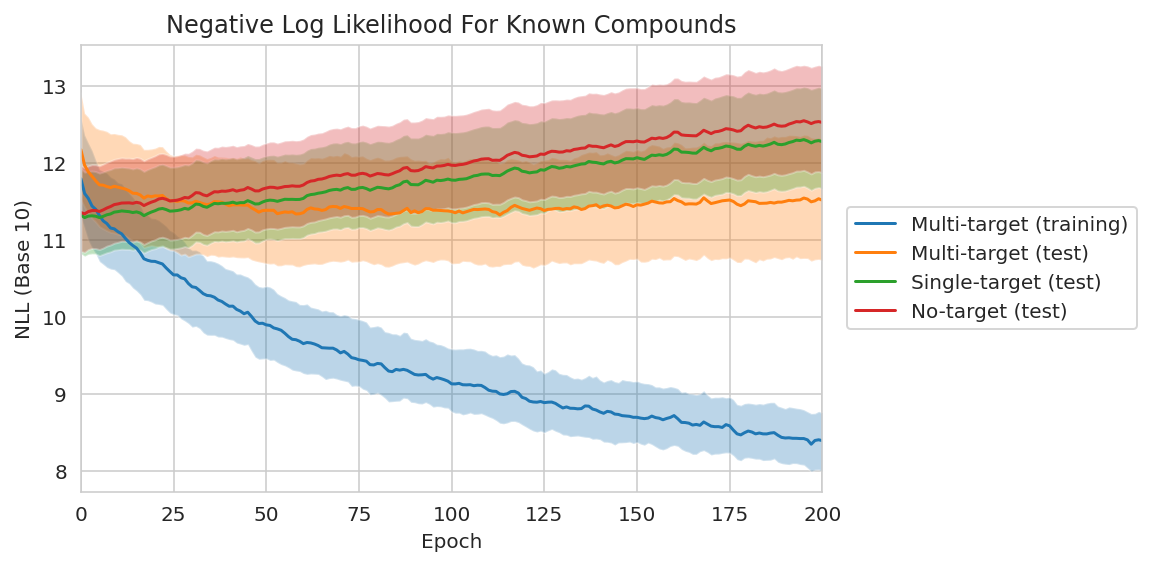

In [14]:
low,mid,up = [0.4,0.5,0.6]
with sns.axes_style("whitegrid"):
    for class_set in ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']:

        tmp = log10.query("class_set == @class_set").quantile([low,mid,up])

        plt.plot(tmp.loc[0.50].values)
        plt.fill_between(range(201), tmp.loc[low].values, tmp.loc[up].values, alpha=0.3)
    plt.xlim(0,200)
    #plt.ylim(0,5)
    plt.xlabel("Epoch")
    plt.ylabel("NLL (Base 10)")
    plt.title("Negative Log Likelihood For Known Compounds")
    plt.tight_layout()
    plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='center left', bbox_to_anchor=(1.02,0.5))

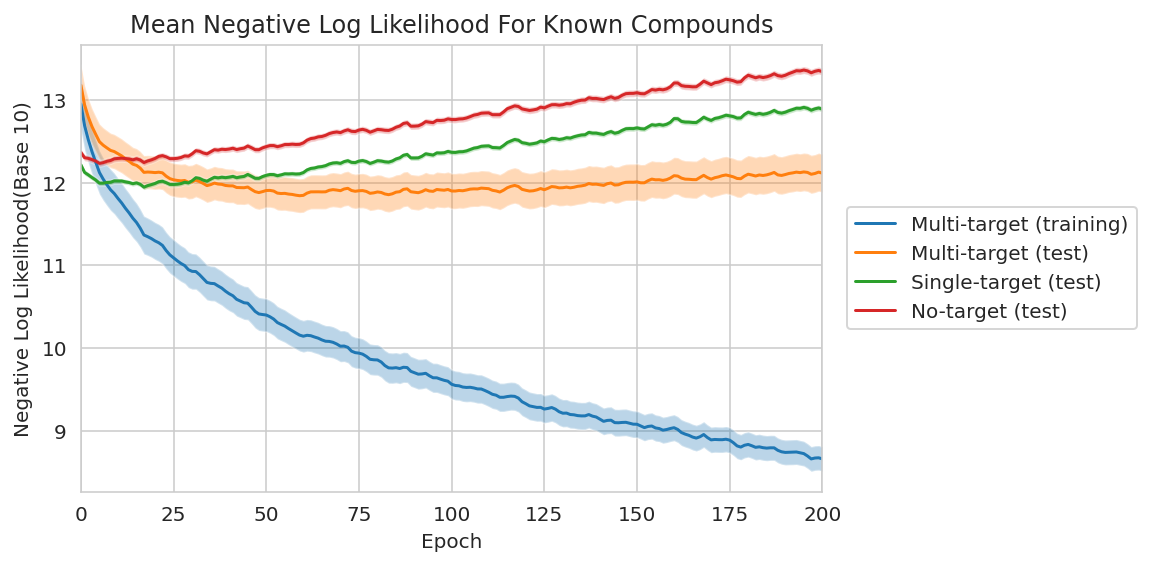

In [15]:
low,mid,up = [1,0,1]
with sns.axes_style("whitegrid"):
    stats = log10.groupby('class_set').agg(['mean', 'count', 'std', 'median'])
    for class_set in ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']:

        means = []
        counts = []
        stds = []
        medians = []
        for i in range(201):
            mean,count,std, median= stats.loc[class_set][i]
            means.append(mean)
            counts.append(count)
            stds.append(std)
            medians.append(median)
            
        counts = np.array(counts)
        means=np.array(means)
        stds = np.array(stds)
        median=np.array(means)
        
        ci_up = means + 2.575*(stds/np.sqrt(counts))
        ci_low = means - 2.575*(stds/np.sqrt(counts))
        
        plt.plot(means)
        plt.fill_between(range(201), ci_low, ci_up, alpha=0.3)
    plt.xlim(0,200)
    #plt.ylim(0,5)
    plt.xlabel("Epoch")
    plt.ylabel("Negative Log Likelihood(Base 10)")
    plt.title("Mean Negative Log Likelihood For Known Compounds")
    plt.tight_layout()
    plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='center left', bbox_to_anchor=(1.02,0.5))

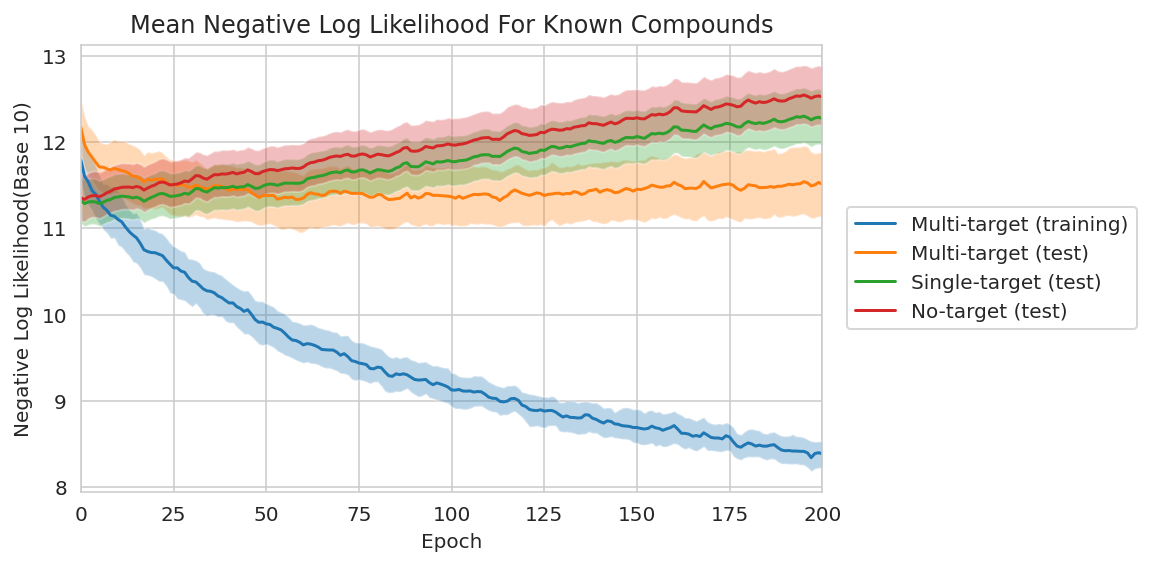

In [16]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'percentile_{:2.0f}'.format(n*100)
    return percentile_

with sns.axes_style("whitegrid"):
    stats = log10.groupby('class_set').agg(['mean', 'count', 'std', 'median', percentile(0.45), percentile(0.55)])
    for class_set in ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']:

        means = []
        counts = []
        stds = []
        medians = []
        p5s = []
        p95s = []
        
        for i in range(201):
            mean,count,std, median, p5, p95= stats.loc[class_set][i]
            means.append(mean)
            counts.append(count)
            stds.append(std)
            medians.append(median)
            p5s.append(p5)
            p95s.append(p95)
            
        counts = np.array(counts)
        means=np.array(means)
        stds = np.array(stds)
        median=np.array(means)
        
        ci_up = means + 2.575*(stds/np.sqrt(counts))
        ci_low = means - 2.575*(stds/np.sqrt(counts))
        
        plt.plot(medians)
        plt.fill_between(range(201), p5s, p95s, alpha=0.3)
    plt.xlim(0,200)
    #plt.ylim(0,5)
    plt.xlabel("Epoch")
    plt.ylabel("Negative Log Likelihood(Base 10)")
    plt.title("Mean Negative Log Likelihood For Known Compounds")
    plt.tight_layout()
    plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='center left', bbox_to_anchor=(1.02,0.5))

In [17]:
with sns.axes_style("whitegrid"):
    print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


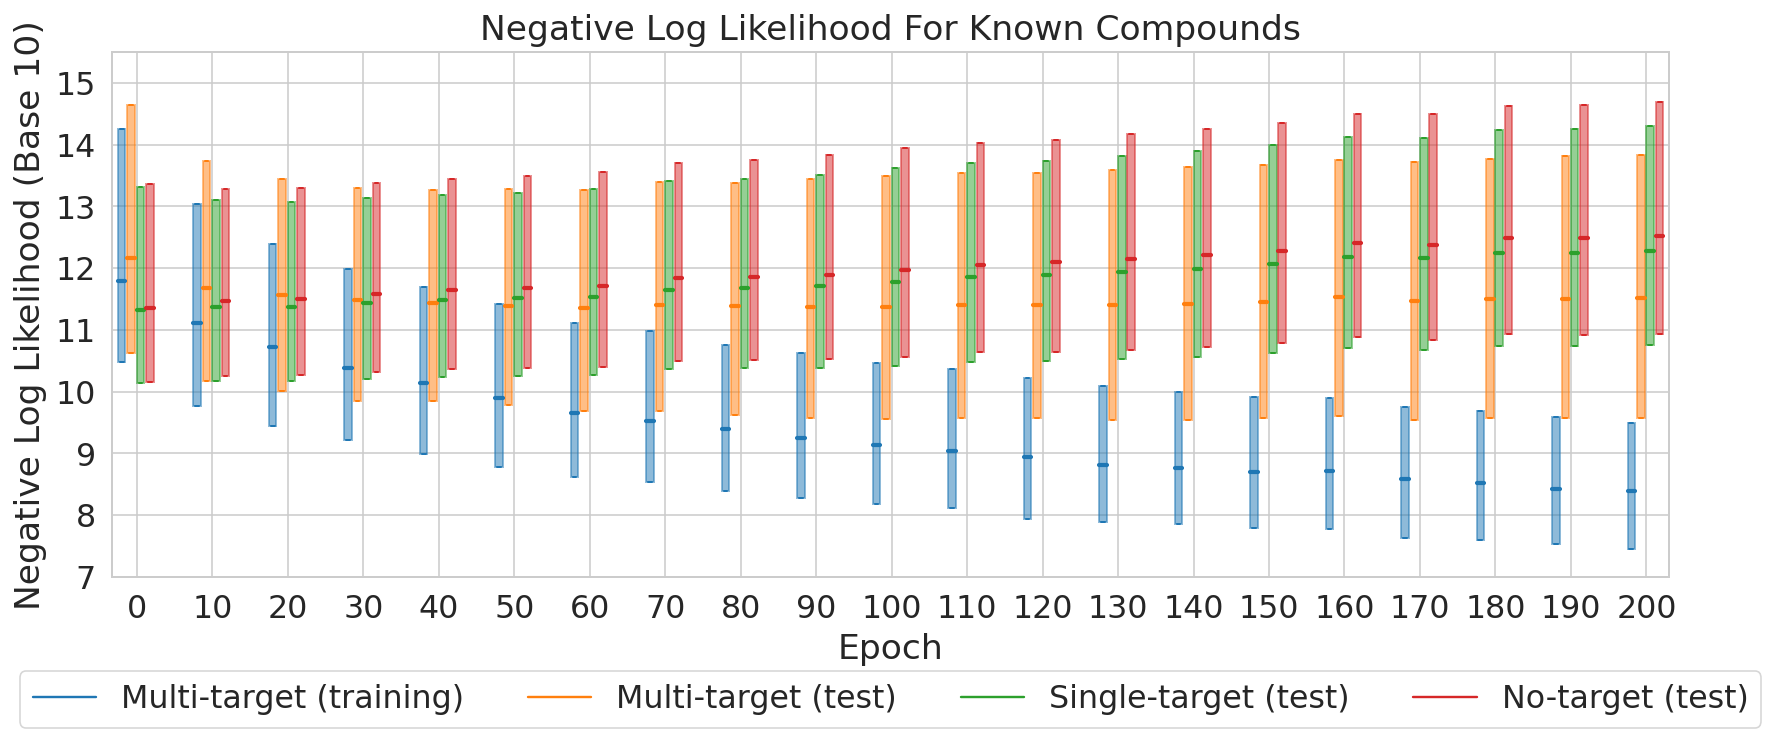

In [18]:

with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):

        def set_box_color(bp, color):
            plt.setp(bp['boxes'], color=color)
            for patch in bp['boxes']:
                patch.set_alpha(alpha=0.5)
            plt.setp(bp['whiskers'], color=color)
            plt.setp(bp['caps'], color=color)
            plt.setp(bp['medians'], color=color)

        fig = plt.figure(figsize=(12,5))

        cols_to_use = list(range(0,201,10))


        medianprops = {'linewidth':2.1} 
        options = { 'sym':'', 'widths':0.4, 'showfliers':False, 'whis':0., 'notch':False,  'patch_artist':True, 'medianprops':medianprops}
        categories = ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']
        labels = ["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ]
        colors= {'multitarget training': '#1f77b4', 'multitarget test': '#ff7f0e', 'singletarget test':'#2ca02c', 'notarget test':'#d62728'}

        offset = -0.8
        offset_step = 0.5

        for class_set, label in zip(categories,labels):    

            data_ = log10.query("class_set == @class_set").iloc[:,:-1]
            data_ = data_[cols_to_use].transpose()

            bp = plt.boxplot(data_, positions=np.array(range(len(cols_to_use)))*len(categories)+offset, **options )
            # draw temporary red and blue lines and use them to create a legend
            set_box_color(bp, colors[class_set])
            plt.plot([], c=colors[class_set], label=label)


            offset += offset_step

        plt.xticks(range(0, len(cols_to_use) *len(categories), len(categories)), cols_to_use)

        plt.ylim(7,15.5)
        plt.xlabel("Epoch")

        plt.ylabel("Negative Log Likelihood (Base 10)")
        plt.title("Negative Log Likelihood For Known Compounds")

        plt.tight_layout()
        #plt.legend(loc='center left', bbox_to_anchor=(1.,0.5))
        lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), ncol=4)
        
        if not os.path.exists("plots/nll.svg"):
            fig.savefig("plots/nll.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
        if not os.path.exists("plots/nll.png"):
            fig.savefig("plots/nll.png", dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

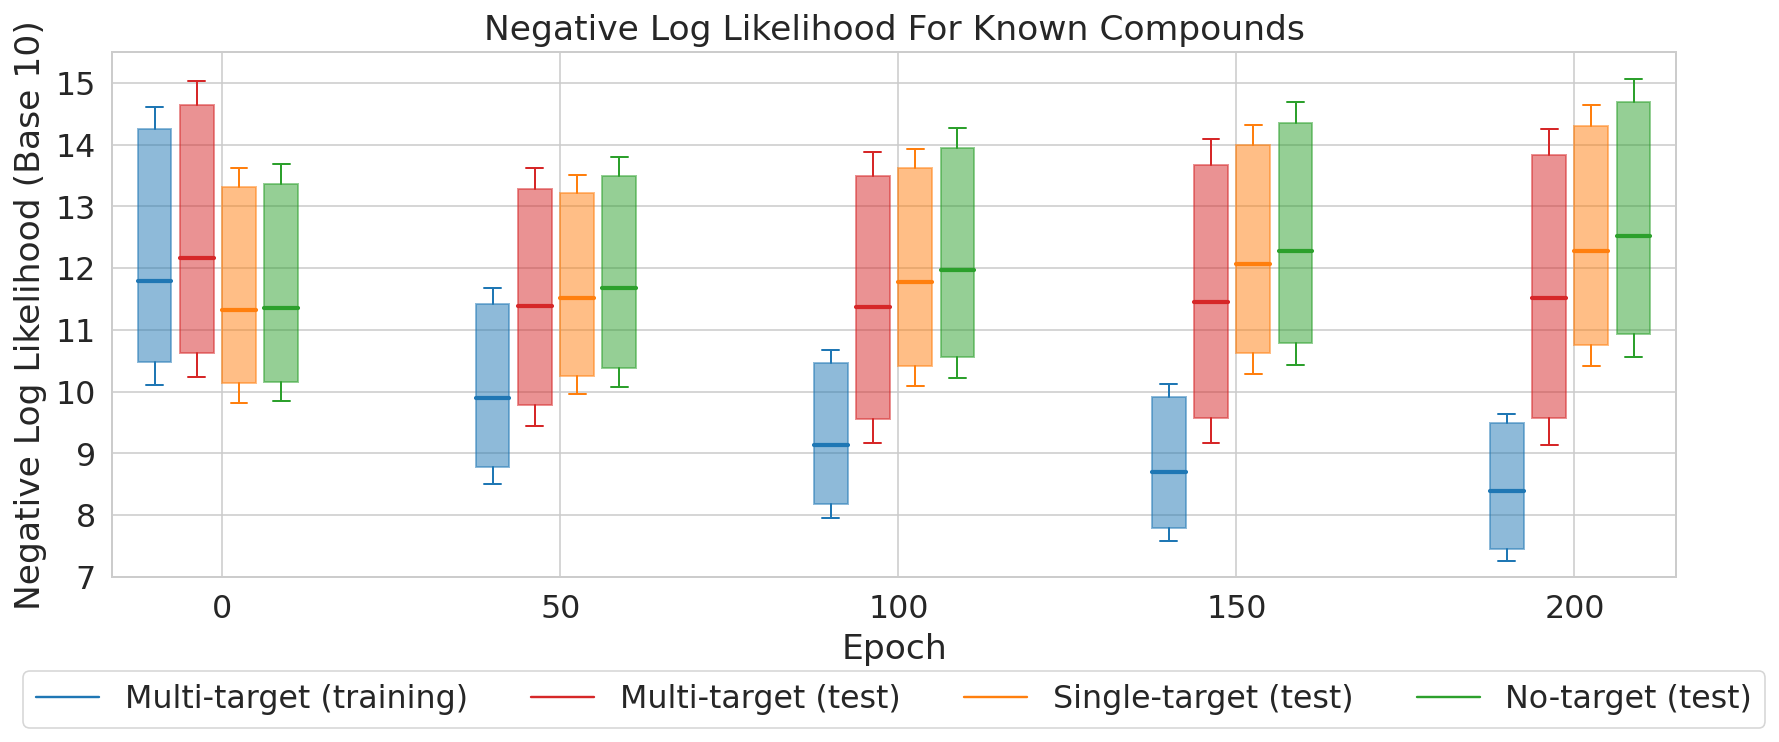

In [19]:

with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):

        def set_box_color(bp, color):
            plt.setp(bp['boxes'], color=color)
            for patch in bp['boxes']:
                patch.set_alpha(alpha=0.5)
            plt.setp(bp['whiskers'], color=color)
            plt.setp(bp['caps'], color=color)
            plt.setp(bp['medians'], color=color)

        fig = plt.figure(figsize=(12,5))

        cols_to_use = list(range(0,201,50))


        medianprops = {'linewidth':2.1} 
        options = { 'sym':'', 'widths':0.4, 'showfliers':True, 'whis':0.1, 'notch':False,  'patch_artist':True, 'medianprops':medianprops}
        categories = ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']
        labels = ["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ]
        colors= {'multitarget training': '#1f77b4', 'multitarget test':'#d62728', 'singletarget test':'#ff7f0e', 'notarget test':'#2ca02c'}

        offset = -0.8
        offset_step = 0.5

        for class_set, label in zip(categories,labels):    

            data_ = log10.query("class_set == @class_set").iloc[:,:-1]
            data_ = data_[cols_to_use].transpose()

            bp = plt.boxplot(data_, positions=np.array(range(len(cols_to_use)))*len(categories)+offset, **options )
            # draw temporary red and blue lines and use them to create a legend
            set_box_color(bp, colors[class_set])
            plt.plot([], c=colors[class_set], label=label)


            offset += offset_step

        plt.xticks(range(0, len(cols_to_use) *len(categories), len(categories)), cols_to_use)

        plt.ylim(7,15.5)
        plt.xlabel("Epoch")

        plt.ylabel("Negative Log Likelihood (Base 10)")
        plt.title("Negative Log Likelihood For Known Compounds")

        plt.tight_layout()
        #plt.legend(loc='center left', bbox_to_anchor=(1.,0.5))
        lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), ncol=4)
        
        if not os.path.exists("plots/nll-data-note.svg"):
            fig.savefig("plots/nll-data-note.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
        if not os.path.exists("plots/nll-data-note.png"):
            fig.savefig("plots/nll-data-note.png", dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [20]:
cols_to_use = 200
for class_set, label in zip(categories,labels):    
    data_ = log10.query("class_set == @class_set").iloc[:,:-1]
    data_ = data_[cols_to_use].transpose()
    print(label, data_.median())

Multi-target (training) 8.38924457505378
Multi-target (test) 11.514193364956592
Single-target (test) 12.2759697724114
No-target (test) 12.52540615665081


In [21]:
10**(12.2759697724114 - 11.514193364956592)

5.7779849654090825